## Questions:
1. Scikit learn comes with pre-loaded dataset, load the digits dataset from that collection and write a helper function to plot the image using matplotlib. [Hint: Explore datasets module from scikit learn]

2. Make a train -test split with 20% of the data set aside for testing. Fit a logistic regression model and observe the accuracy.

3.  Using scikit learn perform a PCA transformation such that the transformed dataset can explain 95% of the variance in the original dataset. Find out the number of components in the projected subspace. [Hint: Refer to decomposition module of scikit learn]

4. Transform the dataset and fit a logistic regression and observe the accuracy. Compare it with the previous model and comment on the accuracy. [Hint: Project both the train and test samples to the new subspace]

5. Compute the confusion matrix and count the number of instances that has gone wrong. For each of the wrong sample, plot the digit along with predicted and original label.

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn import metrics
import matplotlib.pyplot as plt

### Question 1
    1.Scikit learn comes with pre-loaded dataset, load the digits dataset from that collection
    and write a helper function to plot the image using matplotlib.
    [Hint:Explore datasets module from scikit learn]


In [2]:
data_digits = load_digits()
data_digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

<Figure size 432x288 with 0 Axes>

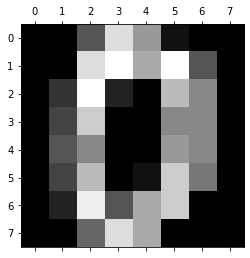

In [3]:
plt.gray()
plt.matshow(data_digits.images[0])
plt.show()

In [4]:
X = data_digits.data
y = data_digits.target
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
#images = data_digits.images.reshape(data_digits.images.shape[0], -1)



### Question 2: 
2. Make a train -test split with 20% of the data set aside for testing. 
    Fit a logistic regression model and observe the accuracy.

In [6]:
logReg = LogisticRegression(solver = 'lbfgs')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

logReg.fit(X_train, y_train)

y_pred = logReg.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9685185185185186


C:\Users\bobbala\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Question 3
3. Using scikit learn perform a PCA transformation such that the transformed dataset can explain 95% of the variance in the original dataset. Find out the number of components in the projected subspace.
[Hint: Refer to decomposition module of scikit learn]

In [7]:
from sklearn.decomposition import PCA
model_pca = PCA(n_components = .95)
model_pca.fit(X_train, y_train)

X_train_transformed = model_pca.transform(X_train)

print(X_train_transformed.shape)
print("X_test before PCA", X_test.shape)

X_test_transformed = model_pca.transform(X_test)
print("X_test after PCA", X_test_transformed.shape)

Variance_Ratio = model_pca.explained_variance_ratio_

print("Variance Ratio = ", model_pca.explained_variance_ratio_)
print(len(Variance_Ratio))

(1257, 29)
X_test before PCA (540, 64)
X_test after PCA (540, 29)
Variance Ratio =  [0.14411041 0.13563254 0.11933466 0.08596596 0.05948996 0.04886943
 0.04414107 0.03627085 0.03401073 0.0304347  0.02381774 0.02220429
 0.01872387 0.01791609 0.01522524 0.01409911 0.01311804 0.01216209
 0.00999592 0.00934697 0.0091004  0.00791746 0.00756556 0.00707828
 0.00689514 0.00581009 0.00562265 0.00512757 0.00495024]
29


 ### Question 4
  4. Transform the dataset and fit a logistic regression and observe the accuracy. Compare it with the previous model andcomment on the accuracy. [Hint: Project both the train and test samples to the new subspace]

In [8]:
logReg2 = LogisticRegression(penalty='l2')
logReg2.fit(X_train_transformed, y_train)

y_pred2 = logReg2.predict(X_test_transformed)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred2))


0.9648148148148148


C:\Users\bobbala\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Question  5.
5. Compute the confusion matrix and count the number of instances that has gone wrong. For each of the wrong sample,plot the digit along with predicted and original label.


In [9]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred2)

classification_report = metrics.classification_report(y_pred2, y_test)
print(conf_matrix)
print("\nclassification_report = \n", classification_report)


[[59  0  0  0  0  0  0  0  0  0]
 [ 1 45  0  0  1  0  0  0  2  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  1 60  0  0  0  1  2  0]
 [ 0  1  0  0 60  0  0  0  0  0]
 [ 0  1  1  1  0 44  0  0  0  0]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  1  0 55  0  0]
 [ 0  0  0  0  0  2  0  0 44  0]
 [ 0  1  0  0  0  1  0  0  1 54]]

classification_report = 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.92      0.94      0.93        48
           2       1.00      0.96      0.98        51
           3       0.94      0.98      0.96        61
           4       0.98      0.97      0.98        62
           5       0.94      0.92      0.93        48
           6       1.00      1.00      1.00        51
           7       0.96      0.98      0.97        56
           8       0.96      0.90      0.93        49
           9       0.95      1.00      0.97        54

    accuracy                           0.96   